# 1. Setup environment

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 25.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.7/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu121>=1.8.0
torch               ✅ 2.5.1+cu121!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu121>=0.9.0
tqdm                ✅ 4.67.1>=4.64.0
psu

# 2. Download dataset from Roboflow
**License Plate Recognition - v4 resized640_aug3x-ACCURATE**

This dataset was exported via roboflow.com on January 13, 2023 at 6:28 PM GMT

The dataset includes 24242 images.
License-plates are annotated in YOLOv8 format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 640x640 (Stretch)

The following augmentation was applied to create 3 versions of each source image:
* 50% probability of horizontal flip
* Randomly crop between 0 and 15 percent of the image
* Random rotation of between -10 and +10 degrees
* Random shear of between -2° to +2° horizontally and -2° to +2° vertically
* Random brigthness adjustment of between -15 and +15 percent
* Random exposure adjustment of between -15 and +15 percent
* Random Gaussian blur of between 0 and 0.5 pixels

You can click [**here**](https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e) for more information about dataset.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Jpbah5sa91Yf8A3r6pSq")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(4)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:11<00:00, 4259.14it/s]


# 3. Customize in Google Colab

In [ ]:
%cat /content/License-Plate-Recognition-4/data.yaml

names:
- License_Plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-recognition-rxg4e
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4
  version: 4
  workspace: roboflow-universe-projects
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
import yaml
with open("/content/License-Plate-Recognition-4/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/License-Plate-Recognition-4/data.yaml
names:
- License_Plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-recognition-rxg4e
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4
  version: 4
  workspace: roboflow-universe-projects
test: /content/License-Plate-Recognition-4/test/images
train: /content/License-Plate-Recognition-4/train/images
val: /content/License-Plate-Recognition-4/valid/images


# 4. Train model from pretrained model yolov8n

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 97.9MB/s]
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Recognition-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

# 5. Check the model on valid dataset


In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/License-Plate-Recognition-4/valid/labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100% 2046/2046 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 128/128 [00:19<00:00,  6.62it/s]
                   all       2046       2132      0.974      0.951      0.976      0.682
Speed: 0.5ms preprocess, 3.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# 6. Test model

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1019 /content/License-Plate-Recognition-4/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 2 License_Plates, 7.4ms
image 2/1019 /content/License-Plate-Recognition-4/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 640x640 2 License_Plates, 9.4ms
image 3/1019 /content/License-Plate-Recognition-4/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 640x640 1 License_Plate, 8.0ms
image 4/1019 /content/License-Plate-Recognition-4/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 640x640 1 License_Plate, 8.6ms
image 5/1019 /content/License-Plate-Recognition-4/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff635e5.jpg: 640x640 1 License_Plate, 8.3ms
image 6/1019 /content/License-Plate-Recognition-4/test/imag

# 7. Results

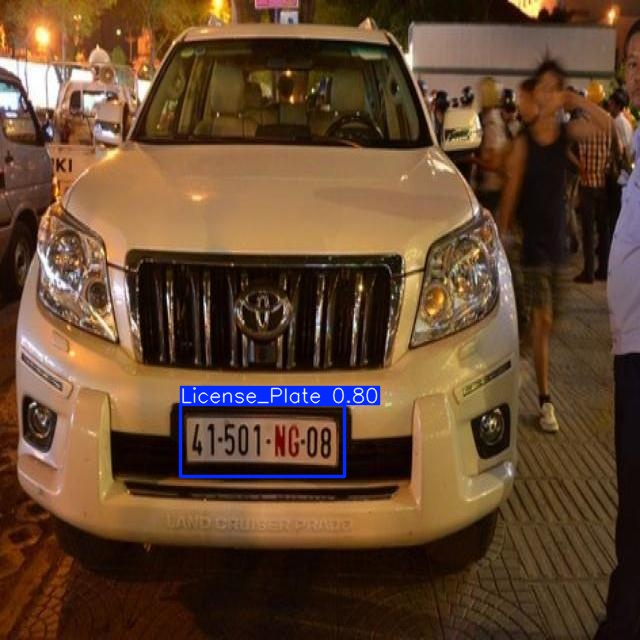

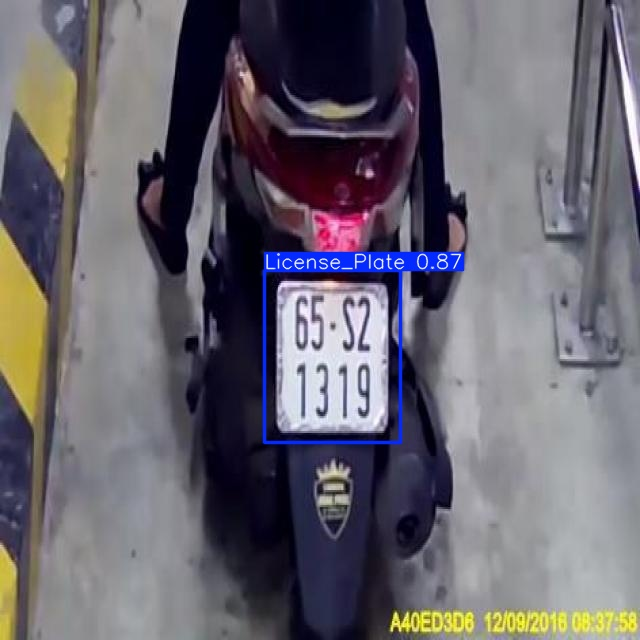

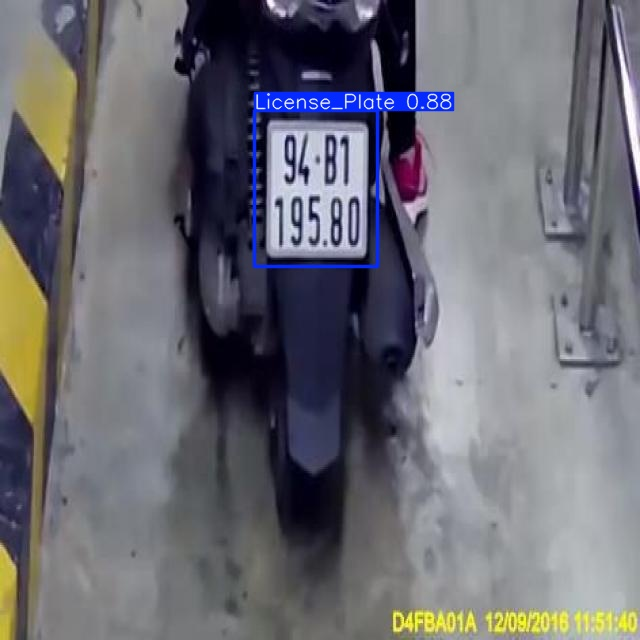

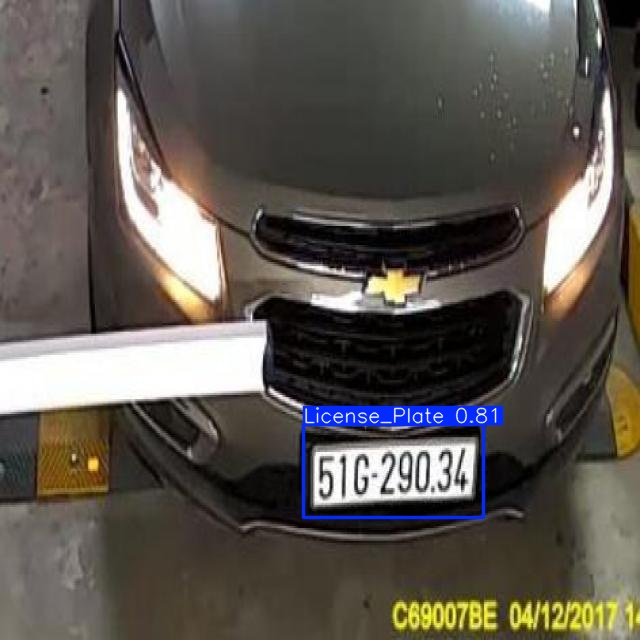

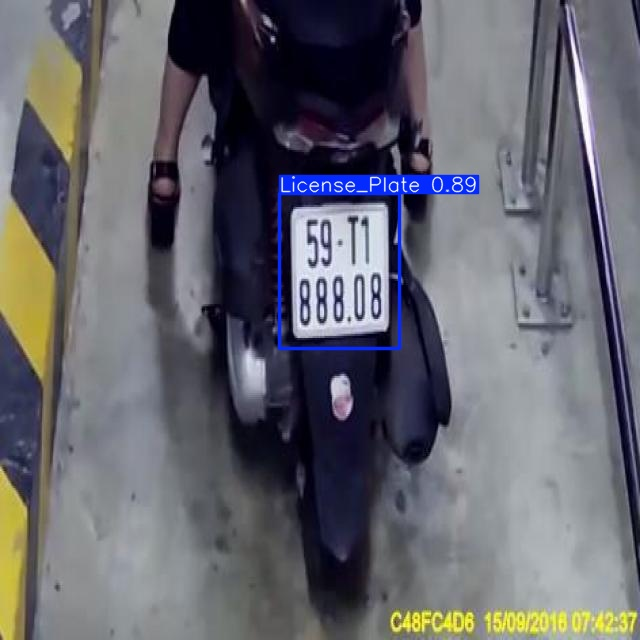

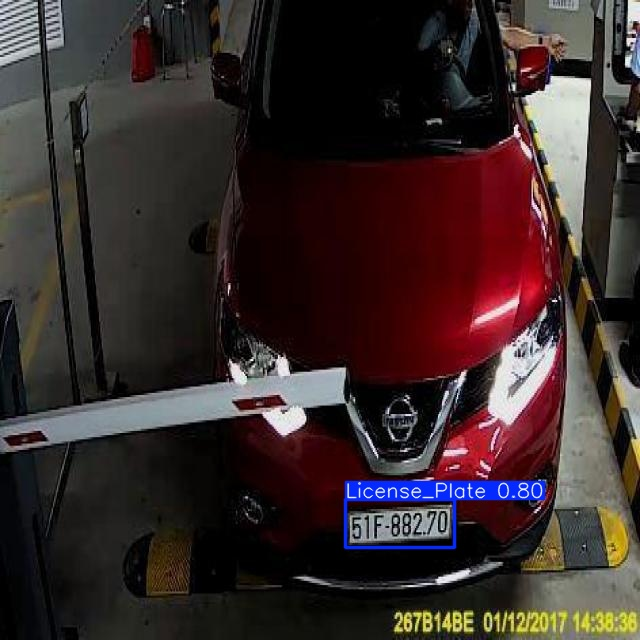

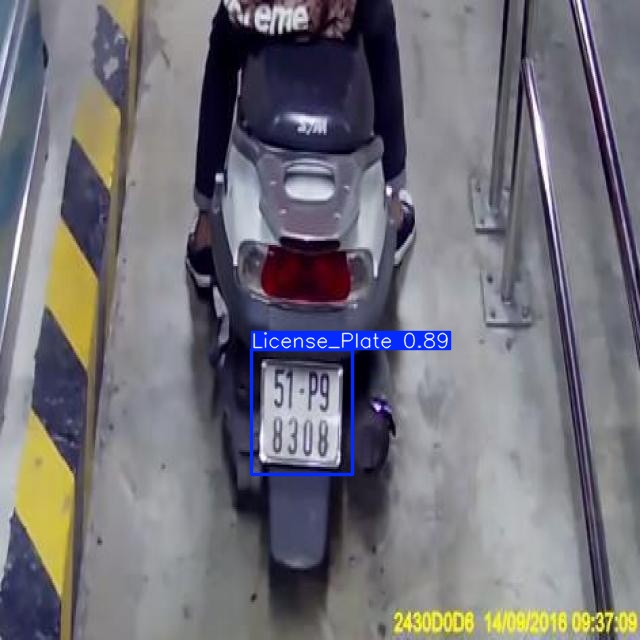

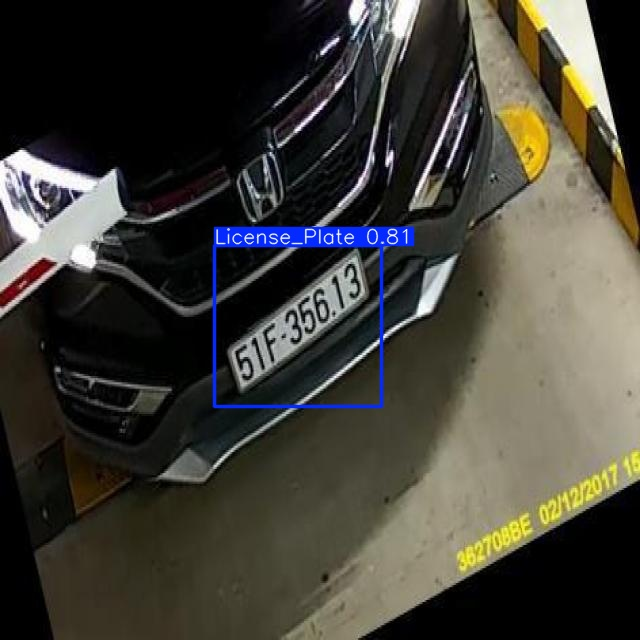

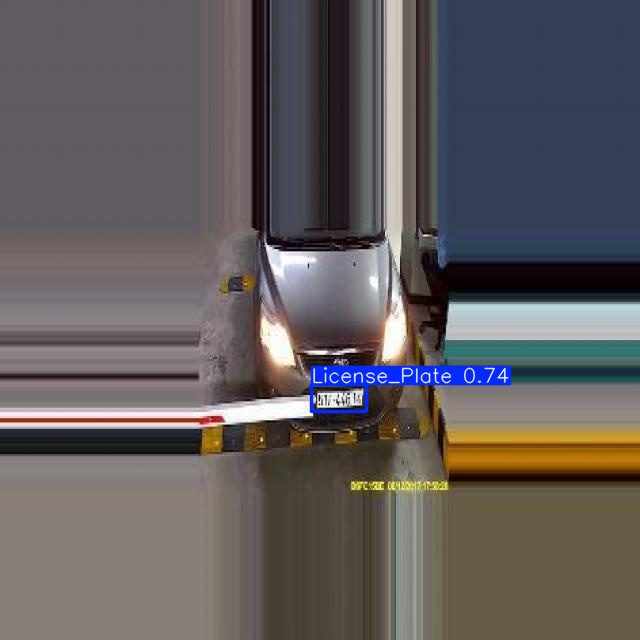

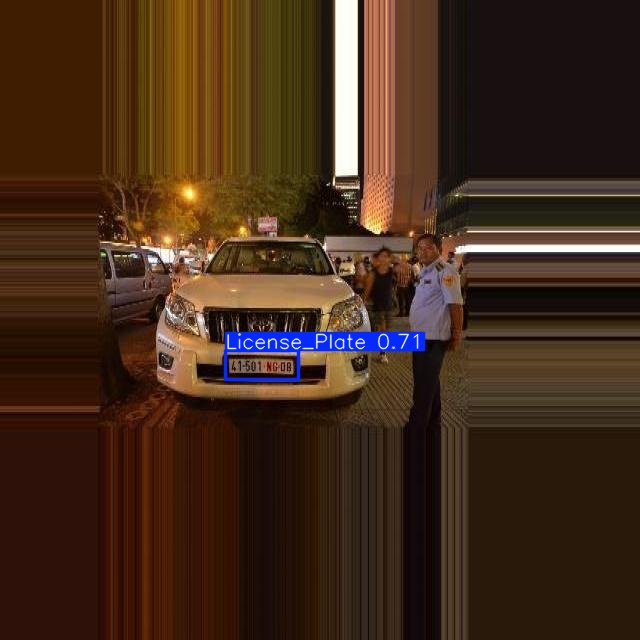

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

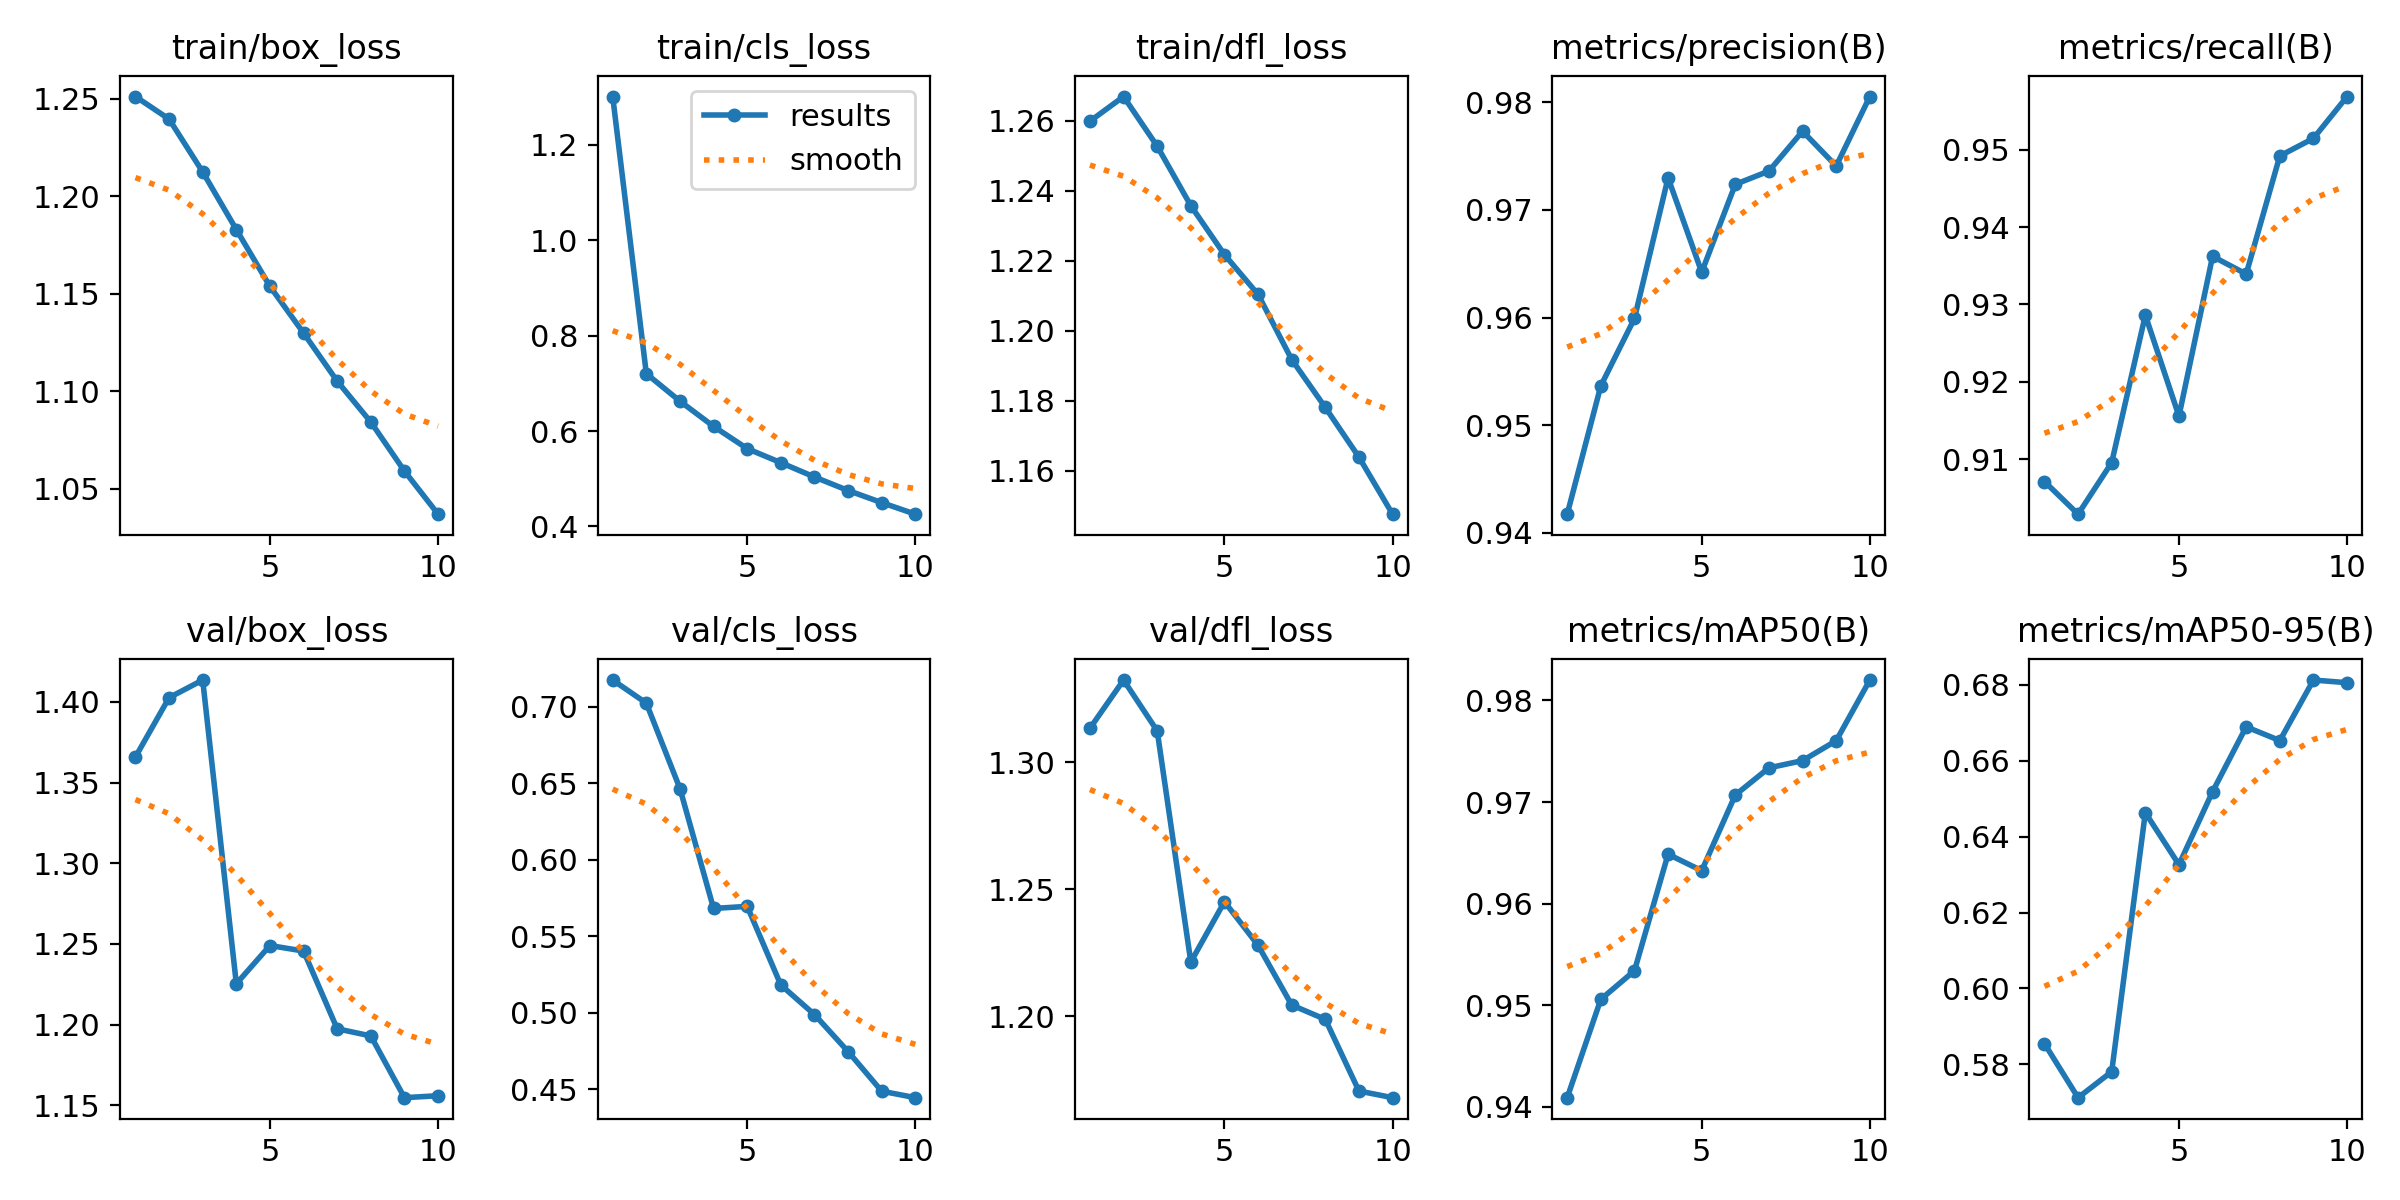

In [ ]:
display(Image(filename='/content/runs/detect/train/results.png'))

# 8. Download model after training (best.pt)

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>